# Logistic Regression

## Part 1 - Data Preprocessing

### Importing the dataset

In [1]:
import pandas as pd
import numpy as np
import tkinter as tk
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt  # Import for plotting
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg  # Import to embed plot in Tkinter
from sklearn.metrics import confusion_matrix


dataset = pd.read_csv('logistic.csv')

In [2]:
dataset.head(10)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
5,6,30,Male,41,14,10,10,Premium,Monthly,500,29,0
6,7,47,Female,37,15,9,28,Basic,Quarterly,574,14,1
7,8,54,Female,36,11,0,18,Standard,Monthly,323,16,0
8,9,36,Male,20,5,10,8,Basic,Monthly,687,8,0
9,10,65,Male,8,4,2,23,Basic,Annual,995,10,0


In [3]:
dataset.info

<bound method DataFrame.info of        CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0               1   22  Female      25               14              4   
1               2   41  Female      28               28              7   
2               3   47    Male      27               10              2   
3               4   35    Male       9               12              5   
4               5   53  Female      58               24              9   
...           ...  ...     ...     ...              ...            ...   
64369       64370   45  Female      33               12              6   
64370       64371   37    Male       6                1              5   
64371       64372   25    Male      39               14              8   
64372       64373   50  Female      18               19              7   
64373       64374   52  Female      45               15              9   

       Payment Delay Subscription Type Contract Length  Total Spend  \
0       

### Getting the inputs and output

In [4]:
X1 = dataset.iloc[:,1:2].values
X2 = dataset.iloc[:,3:7].values
X3 = dataset.iloc[:,9:11].values
X = np.concatenate((X1,X2,X3),1)
y = dataset.iloc[:,-1].values


In [5]:
X

array([[ 22,  25,  14, ...,  27, 598,   9],
       [ 41,  28,  28, ...,  13, 584,  20],
       [ 47,  27,  10, ...,  29, 757,  21],
       ...,
       [ 25,  39,  14, ...,  30, 327,  20],
       [ 50,  18,  19, ...,  22, 540,  13],
       [ 52,  45,  15, ...,  25, 696,  22]])

In [6]:
y

array([1, 0, 0, ..., 1, 1, 1])

### Creating the Training Set and the Test Set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [8]:
X_train

array([[ 38,  18,  24, ...,  14, 630,   4],
       [ 57,  32,   4, ...,   7, 341,  23],
       [ 30,  42,  13, ...,  30, 965,   9],
       ...,
       [ 19,  22,  10, ...,  10, 800,  29],
       [ 59,  46,   2, ...,  11, 135,  28],
       [ 34,  31,  30, ...,  21, 165,  30]])

In [9]:
X_test

array([[ 32,   8,  30, ...,  17, 246,   5],
       [ 50,  38,  30, ...,  27, 846,  23],
       [ 51,  30,  16, ...,  22, 277,   4],
       ...,
       [ 38,  57,   6, ...,  26, 108,  12],
       [ 18,  58,  19, ...,   4, 842,  24],
       [ 25,  34,  26, ...,   1, 256,   3]])

In [10]:
y_train

array([0, 0, 1, ..., 0, 1, 1])

In [11]:
y_test

array([0, 1, 1, ..., 1, 0, 0])

### Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [13]:
X_train

array([[-2.86459005e-01, -8.16992933e-01,  1.01651676e+00, ...,
        -3.54270968e-01,  3.41705088e-01, -1.33227942e+00],
       [ 1.07673595e+00,  8.40535878e-04, -1.25151101e+00, ...,
        -1.14480407e+00, -7.65459080e-01,  8.69039570e-01],
       [-8.60435828e-01,  5.85007299e-01, -2.30898518e-01, ...,
         1.45266184e+00,  1.62509608e+00, -7.52984949e-01],
       ...,
       [-1.64965396e+00, -5.83326228e-01, -5.71102684e-01, ...,
        -8.06004170e-01,  9.92978128e-01,  1.56419294e+00],
       [ 1.22023016e+00,  8.18674005e-01, -1.47831379e+00, ...,
        -6.93070870e-01, -1.55464876e+00,  1.44833404e+00],
       [-5.73447417e-01, -5.75761405e-02,  1.69692509e+00, ...,
         4.36262136e-01, -1.43971823e+00,  1.68005183e+00]])

## Part 2 - Building and training the model

### Building the model

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)

### Training the model

In [15]:
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Inference

Making the predictons of the data points in the test set

In [16]:
y_pred = model.predict(sc.transform(X_test))

In [17]:
y_pred

array([0, 1, 1, ..., 1, 0, 0])

## Part 3: Evaluating the model 

### Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[5503, 1251],
       [1154, 4967]])

### Accuracy

In [19]:
(5503+4967)/(5503+4967+1154+1251)

0.8132038834951456

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8132038834951456

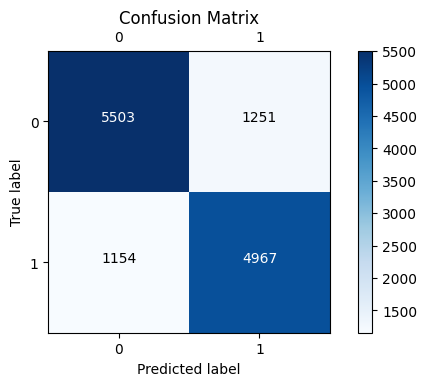

In [21]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are defined earlier in your code
# y_test = [...]  # Your true labels
# y_pred = [...]  # Your predicted labels

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a figure
plt.figure(figsize=(6, 4))

# Define tick marks based on unique classes in y_test
tick_marks = np.arange(len(np.unique(y_test)))

# Add predicted labels above the matrix with added space
plt.xticks(tick_marks, np.unique(y_test), rotation=0)
for i in range(len(np.unique(y_test))):
    plt.text(i, -0.6, str(np.unique(y_test)[i]), ha='center', va='center', fontsize=10)  # Adjusted to -0.6 for more space

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix', pad=20)  # Add padding above the title
plt.colorbar()

# Add true labels on the y-axis
plt.yticks(tick_marks, np.unique(y_test))

# Annotate the confusion matrix with counts
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]}', horizontalalignment='center',
             color='white' if cm[i, j] > thresh else 'black')

# Correctly label the axes
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust space at the top
plt.show()

